<a href="https://colab.research.google.com/github/Vladocx/SPBSTU/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keybert


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
from nltk.corpus import stopwords
from pymystem3 import Mystem
import nltk
from keybert import KeyBERT

nltk.download("stopwords")
filename = 'KKBSMP.csv'
nltk.download("punkt_tab")

def normalize_text(filename: str):

    with open(filename, 'r', encoding='utf-8') as f:
        text = f.read()


    mystem = Mystem()
    russian_stopwords = stopwords.words("russian")

    ltoken = mystem.lemmatize(text.lower())

    clean_tokens = []
    for token in ltoken:
        if token not in russian_stopwords and token.isalnum():
            clean_tokens.append(token)
    cl_text = " ".join(clean_tokens)
    return cl_text

def find_keywords(text: str):

    model = KeyBERT('blanchefort/rubert-base-cased-sentiment')

    keywords = model.extract_keywords(text)
    print(keywords)

cl_text = normalize_text(filename)

find_keywords(cl_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


[('благодарность', 0.9998), ('замечательный', 0.9998), ('поклон', 0.9993), ('нужный', 0.9983), ('хороший', 0.9982)]


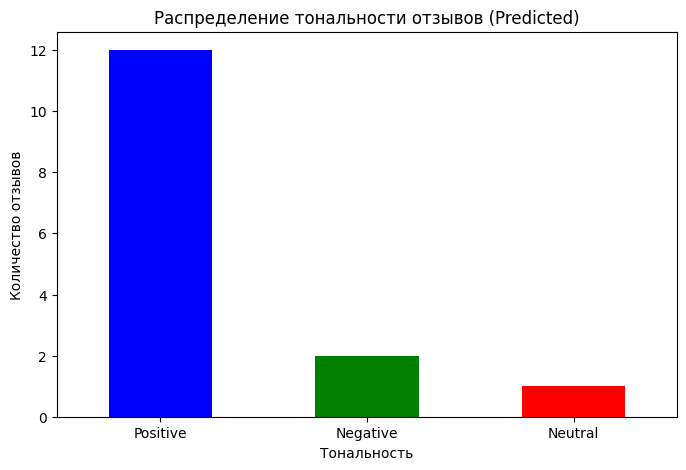

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification
from transformers import BertTokenizerFast
import pandas as pd
import matplotlib.pyplot as plt

def analyze_sentiment(csv_name):
    df = pd.read_csv(csv_name)

    tokenizer = BertTokenizerFast.from_pretrained('blanchefort/rubert-base-cased-sentiment')
    model = AutoModelForSequenceClassification.from_pretrained('blanchefort/rubert-base-cased-sentiment', return_dict=True)

    def predict(text):
        inputs = tokenizer(text, max_length=1024, padding=True, truncation=True, return_tensors='pt')
        outputs = model(**inputs)

        predicted = torch.nn.functional.softmax(outputs.logits, dim=1)
        predicted = torch.argmax(predicted, dim=1).numpy()
        return predicted

    df["predicted_sentiment"] = df["Отзыв"].apply(predict)

    df["predicted_sentiment"] = predict(df["Отзыв"].tolist())
    df["predicted_sentiment"] = df["predicted_sentiment"].map(
        {0: "Neutral", 1: "Positive", 2: "Negative"})

    sentiment_counts = df["predicted_sentiment"].value_counts()
    plt.figure(figsize=(8,5))
    sentiment_counts.plot(kind="bar", color=["blue", "green", "red"])

    plt.xlabel("Тональность")
    plt.ylabel("Количество отзывов")
    plt.title("Распределение тональности отзывов (Predicted)")
    plt.xticks(rotation=0)
    plt.show()


analyze_sentiment("KKBSMP.csv")